## Финальный проект. Вариант 2

### Задание 1. A/B–тестирование

#### Условие
Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as ss
import pingouin as pg

In [2]:
# Получим все имеющиеся данные
active_studs = pd.read_csv('Проект_2_active_studs.csv')
groups = pd.read_csv('Проект_2_groups.csv', sep=";")
cheks = pd.read_csv('Проект_2_checks.csv', sep=";")

##### Рассмотрим данные

In [3]:
# Выведем первые 5 строк таблицы
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [4]:
# Посмотрим на информацию о таблице
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [5]:
# Эти данные были неправильно прочитаны, поэтому в начале необходимо поставить разделитель ";"
# Выведем первые 5 строк таблицы
groups.head()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [6]:
# Посмотрим на информацию о таблице
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
# Эти данные были неправильно прочитаны, поэтому в начале необходимо поставить разделитель ";"
# Выведем первые 5 строк таблицы
cheks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [8]:
# Посмотрим на информацию о таблице
cheks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


#### При работе с этими данными я заметил, что в таблице cheks немного больше записей, чем у меня получается при объединении с таблицей active_studs, поэтому я решил проверить, правильно ли все записано и перенес это в начало

In [9]:
# Проверим количество уникальных значений в таблице cheks, вдруг значения повторяются
print(f"Количество уникальных значений в таблице cheks: {cheks.student_id.nunique()}")
cheks.student_id.nunique() == cheks.student_id.shape[0]

Количество уникальных значений в таблице cheks: 541


True

In [10]:
# Возьмем все student_id, которые есть в таблице cheks, но нет в таблице active_studs
unique_active_studs = active_studs.student_id.unique()
counter = []
for i in cheks.student_id.unique():
    if i not in unique_active_studs:
        counter.append(i)   
len(counter)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


149

In [11]:
# Посмотрим сколько выручки мы могли не заметить
cheks[cheks.student_id.isin(counter)].rev.sum()

105532.0001

In [12]:
# Возьмем все "пропущенные" данные и поставим в соответствие каждому student_id группу, к которой ученик относится
not_active_studs = cheks[cheks.student_id.isin(counter)].merge(groups, left_on='student_id', right_on='id').drop('id', axis=1)
not_active_studs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  149 non-null    int64  
 1   rev         149 non-null    float64
 2   grp         149 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


#### Как стало видно, почему-то некоторые студенты, которые совершали сделки во время проведения эксперимента, не были записаны в таблицу active_studs, из-за этого мы могли упустить важные данные для принятия решения
#### Теперь выберем только активных пользователей

In [13]:
# Возьмем только тех пользователей, которые были активны во время проведения эксперимента
active_studs_group = active_studs.merge(groups, how="inner", left_on='student_id', right_on='id').drop('id', axis=1)
active_studs_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 8327
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  8328 non-null   int64 
 1   grp         8328 non-null   object
dtypes: int64(1), object(1)
memory usage: 195.2+ KB


In [14]:
# Каждому активному пользователю поставим в соответствие то количество денег, которое он потратил и удалим тех,
# кто ничего не покупал
paying_studs = active_studs_group.merge(cheks, how="inner", on='student_id')
paying_studs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  391 non-null    int64  
 1   grp         391 non-null    object 
 2   rev         391 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ KB


In [15]:
# Соединим две таблицы и получим итоговую, с которой и будем работать
paying_studs = pd.concat([paying_studs, not_active_studs])
paying_studs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 148
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  540 non-null    int64  
 1   grp         540 non-null    object 
 2   rev         540 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.9+ KB


In [16]:
# Выделим отдельно контрольную и тестовую группы
control = paying_studs.query('grp == "A"')
test = paying_studs.query('grp == "B"')

#### Для использования статистических критериев важно знать размеры выборок

In [17]:
# Посмотрим на информацию о таблице
control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  107 non-null    int64  
 1   grp         107 non-null    object 
 2   rev         107 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [18]:
# Посмотрим на информацию о таблице
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 1 to 148
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  433 non-null    int64  
 1   grp         433 non-null    object 
 2   rev         433 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.5+ KB


#### В контрольной группе 107 наблюдений, а в тестовой 433. В каждой больше 30, уже хорошо, но их размеры сильно отличаются друг от друга, что может быть чревато, но не должно помешать в поулчении результатов

#### Посмотрим описательные статистики каждой выборки

In [19]:
control.rev.describe()

count     107.000000
mean      860.710280
std       815.893445
min       199.000000
25%       290.000000
50%       690.000000
75%       990.000000
max      3660.000000
Name: rev, dtype: float64

In [20]:
test.rev.describe()

count     433.000000
mean     1106.997699
std       741.714026
min       199.000000
25%       398.000000
50%       880.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

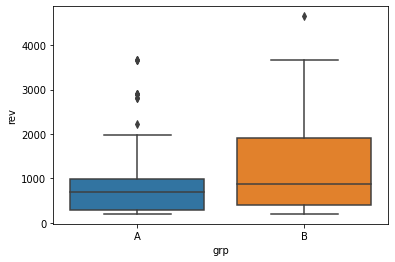

In [21]:
# Построим boxplot для более детального представления данных
sns.boxplot(data=paying_studs, x="grp", y='rev')

#### Видно, что в тестовой группе почти каждый количественный показатель больше, чем в контрольной

#### Посмотрим метрики ARPU и CR относительно всех пользователей и относительно только активных, чтобы узнать,  есть ли различия в группах

In [22]:
# Посчитаем количество платящих пользователей в целом и по группам, выручку по группам, 
# общее количество пользователей
num_paying_st_control = control.student_id.nunique()
num_paying_st_test    = test.student_id.nunique()
total_rev_control     = control.rev.sum()
total_rev_test        = test.rev.sum()
num_st                = groups.id.nunique()
num_st_control        = groups.query('grp == "A"').id.nunique()
num_st_test           = groups.query('grp == "B"').id.nunique()
num_active_st         = active_studs.student_id.nunique() + not_active_studs.student_id.nunique()
num_active_st_control = (active_studs_group.query('grp == "A"').student_id.nunique() 
                             + not_active_studs.query('grp == "A"').student_id.nunique())
num_active_st_test    = (active_studs_group.query('grp == "B"').student_id.nunique() 
                          + not_active_studs.query('grp == "B"').student_id.nunique())

In [23]:
# Посчитаем ARPU по всем пользователям и по активным в дни эксперимента
arpu_control        = round(total_rev_control / num_st, 2)
arpu_test           = round(total_rev_test / num_st, 2)
arpu_active_control = round(total_rev_control / num_active_st, 2)
arpu_active_test    = round(total_rev_test / num_active_st, 2)

In [24]:
# Посчитаем CR по всем пользователям и по активным в дни эксперимента
cr_control        = round(num_paying_st_control / num_st_control * 100, 2)
cr_test           = round(num_paying_st_test / num_st_test * 100, 2)
cr_active_control = round(num_paying_st_control / num_active_st_control * 100, 2)
cr_active_test    = round(num_paying_st_test / num_active_st_test * 100, 2)

In [25]:
# Построим таблицу для отображения результатов
all_func = pd.DataFrame([[num_paying_st_control, total_rev_control, num_st_control, num_active_st_control, 
                          arpu_control, arpu_active_control, cr_control, cr_active_control], 
                         [num_paying_st_test, total_rev_test, num_st_test, num_active_st_test, 
                          arpu_test, arpu_active_test, cr_test, cr_active_test]], 
                        columns=['paying_students', 'total_revenue', 'number_students', 
                                 'number_active_students', 'ARPU', 'ARPAU', 'CR', 'CR_active'], 
                        index=['control', 'test'])
all_func

,paying_students,total_revenue,number_students,number_active_students,ARPU,ARPAU,CR,CR_active
control,107,92096.0000,14671,1564,1.24,10.85,0.73,6.84
test,433,479330.0036,59813,6913,6.44,56.46,0.72,6.26


#### Смотря на полученные данные, можно сказать, что в тестовой группе примерно в 4 раза больше наблюдений и из-за этого все метрики кажутся очень большими. Однако, видно, что даже при таком большом различии тестовая группа имеет намного более лучшие показатели. Сначала рассмотрим данные в исходном виде, а потом попробуем взять выборки с одинаковым количеством наблюдений.

#### Теперь рассмотрим общее распределение полученных данных

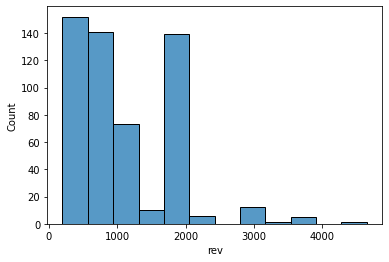

In [26]:
# Посмотрим на расперделение
sns.histplot(paying_studs, x='rev')

#### Видно, что оно сильно отличается от нормального, попробуем прологарифмировать

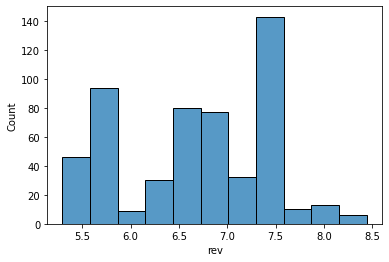

In [27]:
# Прологарифмируем данные
sns.histplot(paying_studs, x=np.log(paying_studs.rev))

#### Не сильно поменялось, но не всегда нужно иметь идеально нормальное распределение для применения тестов

#### Посмотрим на распределеине каждой выборки отдельно

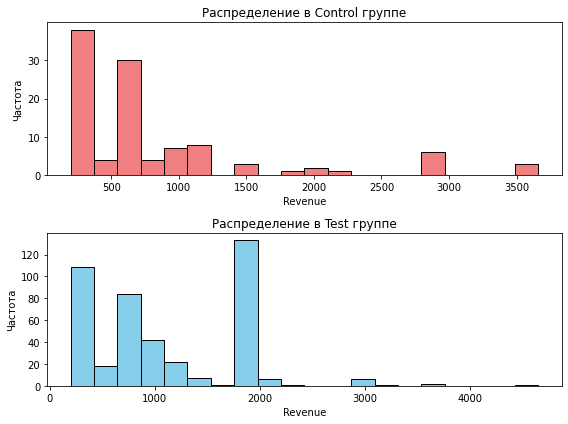

In [28]:
# Теперь посмотрим на распределения по группам
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].hist(control['rev'], bins=20, color="lightcoral", edgecolor='black')
ax[0].set_title('Распределение в Control группе')
ax[0].set_xlabel('Revenue')
ax[0].set_ylabel('Частота')

ax[1].hist(test['rev'], bins=20, color="skyblue", edgecolor='black')
ax[1].set_title('Распределение в Test группе')
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

#### Также попробуем прологарифмировать

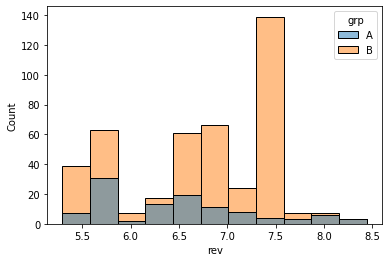

In [29]:
# Прологарифмируем данные
sns.histplot(paying_studs, x=np.log(paying_studs.rev), hue='grp')

#### Не нормальность данных остается не изменной, поэтому будем длеать поправку на это. Также при наложении графиков уже можно заметить чуть большие столбцы у тестовой группы. Теперь проверим это все статистически 

In [30]:
# Возьмем только столбцы с выручкой
control_rev = control.rev
test_rev = test.rev

#### Проверим каждую выборку на нормальность с помощью теста Шапиро-Уилка. В данном тесте:
#### H<sub>0</sub> - данные имеют нормальное распределение
#### H<sub>1</sub> - распределение отличается от нормального

In [31]:
# Применим тест Шапиро-Уилка для контрольной группы
ss.shapiro(control_rev)

ShapiroResult(statistic=0.7196124196052551, pvalue=5.321687643507211e-13)

In [32]:
# Применим тест Шапиро-Уилка для тестовой группы
ss.shapiro(test_rev)

ShapiroResult(statistic=0.867313027381897, pvalue=9.542798088039443e-19)

#### Теперь точно можно сказать, что распределения не являются нормальными

#### Так как у нас существенные отличия от нормальности, то проверяя выборки на равенство дисперсий будем пользоваться тестом Левена, где:
#### H<sub>0</sub> - Дисперсии равны
#### H<sub>1</sub> - Дисперсии отличаются

In [33]:
# Применим тест Левена
ss.levene(control_rev, test_rev)

LeveneResult(statistic=4.0997998278194325, pvalue=0.043381693677143875)

####  Нулевая гипотеза отвергается, поэтому при использовании тестов будем делать поправку на не равность дисперсий
#### Итак, теперь проверим гипотезу о том, что новая механика оплаты лучше старой. Будем использовать критерий Стьюдента с поправкой на не равность дисперсий (Уэлча), в нем:
#### H<sub>0</sub> - средние в выборках равны
#### H<sub>1</sub> - средние отличаются
#### Применяем t-тест потому, что выборки имеют > 30 наблюдений, а распределение не сильно отклоняется от нормального

In [34]:
# Применим t-тест из библиотеки scipy
ss.ttest_ind(control_rev, test_rev, equal_var=True)

Ttest_indResult(statistic=-3.0139777685309754, pvalue=0.002699993302662584)

In [35]:
# Применим t-тест из библиотеки pingouin
pg.ttest(control_rev, test_rev, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.013978,538,two-sided,0.0027,"[-406.81, -85.77]",0.325388,9.104,0.852826


### Выводы
### Проведя анализ результатов A/B-теста, можно сказать, что новая механика оплаты лучше, чем старая. Это следует из того, что при использовании t-теста p-value оказалось меньше 0.05. Также это решение подкрепляют построенные раннее графики и посчитанные метрики, на которых видно, что тестовые показатели лучше контрольных.
### Исходя из выше сказанного, можно запускать новую механику оплаты на всех пользователей.

### Задание 2. Python

#### Задача
Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [46]:
def add_info(old_file, new_file_name, sep=','):
    
    """
    add_info(objs: old_file: DataFrame, new_file_name: str, sep: str = ',') -> DataFrame
    
    Parameters
    ----------
    old_file : файл, к которому необходимо добавить новые данные.
    new_file_name : имя нового файла, который нужно добавить.
    sep : разделитель, который используется в файле, который нужно добавить.
    
    Returns
    -------
    DataFrame
        Функция возвращает датафрейм с новыми данными. Также показываются необходимые метрики 
        и статистики
        
    Notes
    -----
    Данная функция добавляет к уже имеющемуся датафрейму, пересчитывает метрики и возвращает 
    новую таблицу с данными. 
    """
    
    new_info = pd.read_csv(new_file_name, sep=sep)
    new_info = new_info.merge(cheks, left_on='id', right_on='student_id', how='left').dropna()\
                       .drop('id', axis=1)[['student_id', 'grp', 'rev']]
    old_file = pd.concat([old_file, new_info])
    control = old_file.query('grp == "A"')
    test = old_file.query('grp == "B"')
    
    num_paying_st_control = control.student_id.nunique()
    num_paying_st_test    = test.student_id.nunique()
    total_rev_control     = control.rev.sum()
    total_rev_test        = test.rev.sum()
    num_st                = groups.id.nunique()
    num_st_control        = groups.query('grp == "A"').id.nunique()
    num_st_test           = groups.query('grp == "B"').id.nunique()
    num_active_st         = active_studs.student_id.nunique() + not_active_studs.student_id.nunique()
    num_active_st_control = (active_studs_group.query('grp == "A"').student_id.nunique() 
                                 + not_active_studs.query('grp == "A"').student_id.nunique())
    num_active_st_test    = (active_studs_group.query('grp == "B"').student_id.nunique() 
                              + not_active_studs.query('grp == "B"').student_id.nunique())
    
    arpu_control        = round(total_rev_control / num_st, 2)
    arpu_test           = round(total_rev_test / num_st, 2)
    arpu_active_control = round(total_rev_control / num_active_st, 2)
    arpu_active_test    = round(total_rev_test / num_active_st, 2)
    cr_control          = round(num_paying_st_control / num_st_control * 100, 2)
    cr_test             = round(num_paying_st_test / num_st_test * 100, 2)
    cr_active_control   = round(num_paying_st_control / num_active_st_control * 100, 2)
    cr_active_test      = round(num_paying_st_test / num_active_st_test * 100, 2)
    
    all_func_new = pd.DataFrame([[num_paying_st_control, total_rev_control, num_st_control, 
                                  num_active_st_control, arpu_control, arpu_active_control, 
                                  cr_control, cr_active_control], 
                                 [num_paying_st_test, total_rev_test, num_st_test, num_active_st_test, 
                                  arpu_test, arpu_active_test, cr_test, cr_active_test]], 
                                columns=['paying_st', 'total_rev', 'num_st', 'num_active_st', 
                                 'arpu', 'arpu_active', 'cr', 'cr_active'], index=['control', 'test'])
    print(f'Сравнительная таблица контрольной и тестовой групп:\n {all_func_new}\n')
    print(f'Посмотрим на описательные статистики:\n')
    print(f'Контрольная группа:\n{control.rev.describe()}\n')
    print(f'Тестовая группа:\n{test.rev.describe()}\n')
    print('Проверим каждую выборку на нормальность:')
    print(ss.shapiro(control.rev))
    print(ss.shapiro(test.rev))
    print(f'\nПроверим выборки на равенство дисперсий:\n{ss.levene(control.rev, test.rev)}\n')
    print(f'Воспользуемся статистическим тестом:\n'
          f'{ss.ttest_ind(control.rev, test.rev, equal_var=False)}')
    return old_file

In [47]:
help(add_info)

Help on function add_info in module __main__:

add_info(old_file, new_file_name, sep=',')
    add_info(objs: old_file: DataFrame, new_file_name: str, sep: str = ',') -> DataFrame
    
    Parameters
    ----------
    old_file : файл, к которому необходимо добавить новые данные.
    new_file_name : имя нового файла, который нужно добавить.
    sep : разделитель, который используется в файле, который нужно добавить.
    
    Returns
    -------
    DataFrame
        Функция возвращает датафрейм с новыми данными. Также показываются необходимые метрики 
        и статистики
        
    Notes
    -----
    Данная функция добавляет к уже имеющемуся датафрейму, пересчитывает метрики и возвращает 
    новую таблицу с данными.



In [48]:
update_paying_studs = add_info(paying_studs, 'Проект_2_group_add.csv')

Сравнительная таблица контрольной и тестовой групп:
          paying_st    total_rev  num_st  num_active_st  arpu  arpu_active  \
control        107   92096.0000   14671           1564  1.24        10.85   
test           434  481230.0036   59813           6913  6.46        56.68   

           cr  cr_active  
control  0.73       6.84  
test     0.73       6.28  

Посмотрим на описательные статистики:

Контрольная группа:
count     107.000000
mean      860.710280
std       815.893445
min       199.000000
25%       290.000000
50%       690.000000
75%       990.000000
max      3660.000000
Name: rev, dtype: float64

Тестовая группа:
count     434.000000
mean     1108.824893
std       741.834304
min       199.000000
25%       420.750000
50%       935.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

Проверим каждую выборку на нормальность:
ShapiroResult(statistic=0.7196124196052551, pvalue=5.321687643507211e-13)
ShapiroResult(statistic=0.8672363758087158, pvalue=8

#### Задача
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [49]:
def update_graphs(update_df):
    
    """
    update_graphs(objs: update_df: DataFrame) -> None
    
    Parameters
    ----------
    update_df : новый датафрейм, к которому добавлена информация
    
    Notes
    -----
    Данная функция ничего не возвращает и перестраивает раннее полученные графики, исходя из новых данных
    """
    
    control = update_df.query('grp == "A"')
    test = update_df.query('grp == "B"')
    
    print('Рассмотрим общее распределение полученных данных и распределение по группам\n')
    sns.histplot(update_df, x='rev')
    
    # Теперь посмотрим на распределения по группам
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].hist(control['rev'], bins=20, color="lightcoral", edgecolor='black')
    ax[0].set_title('Распределение в Control группе')
    ax[0].set_xlabel('Revenue')
    ax[0].set_ylabel('Частота') # Добавляем подпись оси y

    # График для test
    ax[1].hist(test['rev'], bins=20, color="skyblue", edgecolor='black')
    ax[1].set_title('Распределение в Test группе')
    ax[1].set_xlabel('Revenue')
    ax[1].set_ylabel('Частота') # Добавляем подпись оси y

    plt.tight_layout() # Предотвращает наложение графиков
    plt.show()
    
    print('Графически посмотрим на описательные статистики\n')
    sns.boxplot(data=paying_studs, x="grp", y='rev')

In [50]:
help(update_graphs)

Help on function update_graphs in module __main__:

update_graphs(update_df)
    update_graphs(objs: update_df: DataFrame) -> None
    
    Parameters
    ----------
    update_df : новый датафрейм, к которому добавлена информация
    
    Notes
    -----
    Данная функция ничего не возвращает и перестраивает раннее полученные графики, исходя из новых данных



Рассмотрим общее распределение полученных данных и распределение по группам



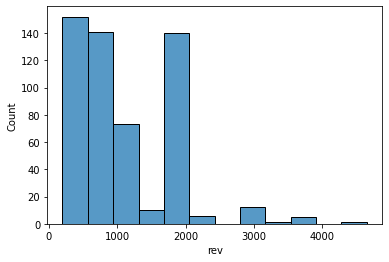

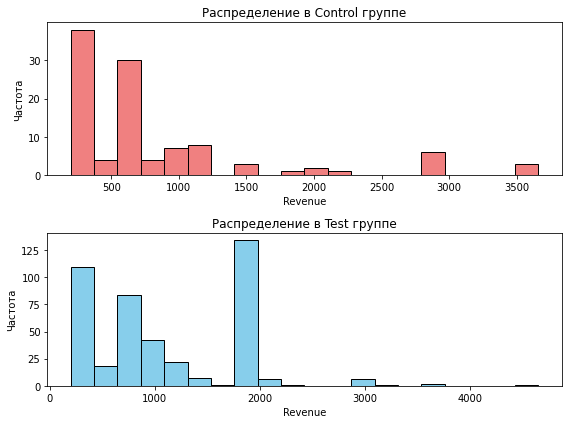

Графически посмотрим на описательные статистики



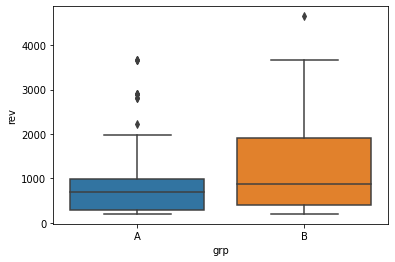

In [51]:
update_graphs(update_paying_studs)